# Kernel-based Learning

   - 회귀분석과 대부분의 분류 알고리즘에서는 데이터를 선형분리 가능하다는 가정이 필요
   - 데이터의 모양이 정말로, 완전히 비선형인 경우는 문제가 달라진다.
   - PCA, LDA 같은 알고리즘은 차원축소를 위한 선형 변환 기법을 이용하기 때문에, 선형으로 분리 불가능한 데이터에 대해서는 적당하지 않다. 

## 3. KFDA(Kernel Fisher Discriminant Analysis)
    - project 시켰을 때 가장 잘 구분하는 축을 찾는 LDA에서 시작된 것으로, 비선형 데이터들을 잘 근사시키기 위해 커널을 도입한 분석법.
    
### 3-1. Linear Discriminant Analysis   
   - class distance에는 class간의 거리와, class 내부 점들 사이의 거리가 있다.
   - class간의 거리는 최대화하면서, 내부 점들 사이 거리는 최소화한다.
   $$ max J(w) = {(m_2-m_1)^2 \over{s_1^2+s_2^2}}$$
   
   - 위의 식을 w를 이용해 표현한 후, w에 대해 미분하면, w는 분산과 거리 행렬 조합의 고유벡터가 된다.
   - 고유값 분해를 통해 고유벡터와 고유값을 구한다.
   
### 3-2. Kernel Fisher Discriminant
   - 위의 최대화 식에서 평균치들과, 원 데이터들을 매핑시킨 매핑점들을 이용해 나타낸다.
   - 매핑함수를 원 데이터와 커널함수를 이용해서 다시 표현하고, 새롭게 구해진 식과 조건들을 위와 같은 방법으로 풀어준다.

### 3-3. Code 구현

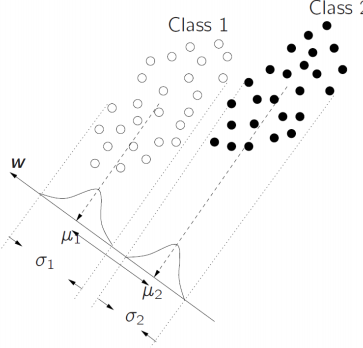

In [5]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename="C:/Users/dsba/Downloads/ba/lda.png",width=400,height=450)


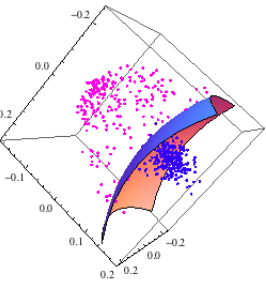

In [6]:
Image(filename="C:/Users/dsba/Downloads/ba/kfda.png",width=400,height=450)

## 4. KPCA(Kernel Principal Component Analysis)
    - 원 데이터의 분산을 최대로 유지하는 선형 축을 찾는 pca에서, 데이터들이 심하게 비선형일 경우, 커널을 활용해 비틀어진 축을 찾는다.
    - 비틀어진 축으로 project 시키면, 데이터 표현이 더 잘됨.
    
### 4-1. 도출 과정   
   - data centering을 진행하고, covariance matrix를 매핑함수를 이용해 나타낸다.(비선형의 축을 찾기 위해 데이터를 고차원으로 매핑시킴)
   - cov 행렬을 이용해 pca의 축성분을 끌어내는 식을 정의하고, 그 축 성분을 원데이터의 매핑된 점들로 표현한다.
   - 그리고 커널함수를 이용해, 비선형 축을 구성하게 하는 알파값들을 구하여 고유벡터들을 구한다.
   
### 4-2. Code 구현

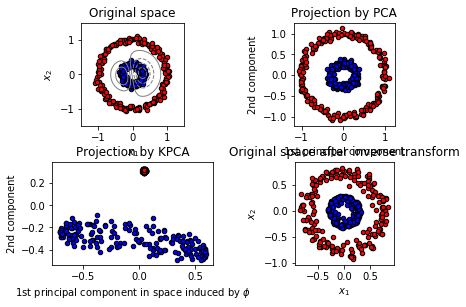

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

In [ ]:


79p~ kernel을 적용.
   지금 데이터를 이용해 매핑된 고차원의 점들을 이용한 값을 계산하기 위해,
   클래스 중심간의 거리와 분산을 매핑함수를 이용해 나타낸다.

80p   최대화하고자 하는 식에 대한 분자와 분모도, 위에서 정의한 식으로 표현한다.
   위에서 정의한 두 식을 풀어쓰기 위해, Projected vector와 Projected mean을 원 데이터와 매핑함수, 커널함수를 이용한 수식으로 나타낸다. 
   

8182p   Pv와 Pm에서 구한 식을 이용해, 분모 분자를 원 데이터와 커널을 이용해 표현.
83p   ??

85p   새로 표현된 최대화 식을 , LDA를 푸는 과정과 같이 풀어주면 됨.

KPCA : 일반 pca는 축이 선형이지만, 데이터들이 linear하지 않으면 
   Kernel을 활용해 분산을 더 줄게 하는, non-linear한 pca 축들을 추출한다. 

92p   data centering은 가정, covariance matrix를 매핑함수를 통해 표현.
   cov 행렬로부터 pca의 축벡터인 고유벡터를 끌어내는 식을 정의.

93p   축벡터를 원데이터와 매핑함수를 이용해서 표현.
   그리고 그 축벡터를 이용해 위에 식에 대입,
   그리고 매핑된 점들간의 내적을 커널함수를 이용해서 표현.
   y값을 벡터축과 매핑된 점으로 표현하고 거기서 축벡터를 구성하게하는 a값들을 구함.
   결론적으로 구한 식에 이를 대입해서 고유값을 구하고 그로 고유벡터들을 구한다.

